## Statistical Analysis of the "FastagFraudDetection.csv". This analysis is focused on identifying fraudulent transactions related to the Fastag system, which is used for electronic toll collection on highways. The dataset includes detailed information about each transaction, including the vehicle type, toll booth, lane type, transaction amounts, and more.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('/content/drive/MyDrive/OESON Internship/EDA/FastagFraudDetection.csv')

In [96]:
data.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [97]:
# Remove records where both Transaction_Amount and Amount_paid are zero
data = data[(data['Transaction_Amount'] != 0) | (data['Amount_paid'] != 0)]
data.shape

(4286, 13)

In [98]:
#Export  Interest rate Dataset to google drive
# path = '/content/drive/MyDrive/OESON Internship/EDA/FastagFraud_no_zero.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   data.to_csv(f)


# Check for missing values

In [99]:
data.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

#### Replace missing values from mean and median for numeric columns only

In [100]:
data.fillna(data.mean(numeric_only=True), inplace=True)

#### Replace missing values from mode for categorical columns only

In [101]:
data['FastagID'].fillna(data['FastagID'].mode().iloc[0], inplace=True)

#### Verify missing values

In [102]:
data.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

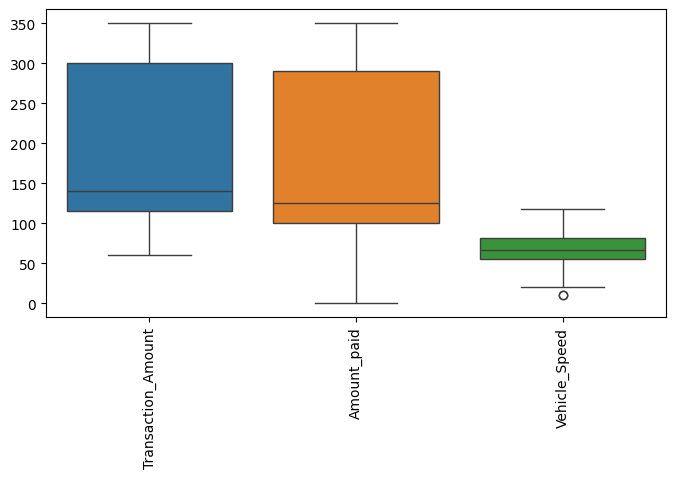

In [103]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data[['Transaction_Amount','Amount_paid','Vehicle_Speed']])
plt.xticks(rotation=90)
plt.show()

In [104]:
df = data.loc[data['Fraud_indicator']=='Fraud']

In [105]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

Minimum:60.00
Mean:193.56
Median:145.00
Mode:120.00
Maximum:350.00



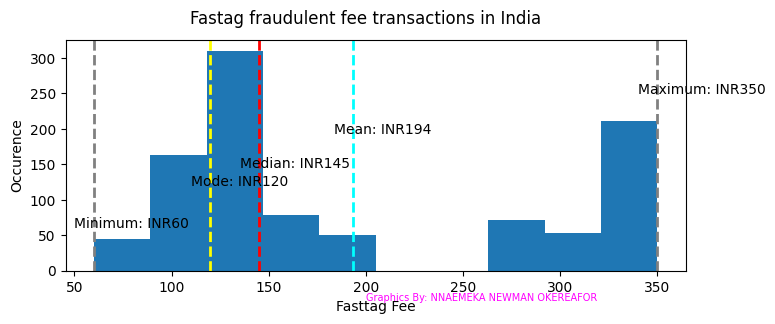

In [106]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig = plt.figure(figsize = (8,3))

    # Plot the histogram
    plt.hist(var_data)
    plt.xlabel('Fasttag Fee')
    plt.ylabel('Occurence')
    plt.text(min_val-10, min_val,f"Minimum: INR{round(min_val)}")
    plt.text(mean_val-10, mean_val,f"Mean: INR{round(mean_val)}")
    plt.text(med_val-10, med_val,f"Median: INR{round(med_val)}")
    plt.text(mod_val-10, mod_val,f"Mode: INR{round(mod_val)}")
    plt.text(max_val-10, max_val-100,f"Maximum: INR{round(max_val)}")

    # Add lines for the mean, median, and mode
    plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    #ax.text(0, invt['Investment'].mean(),"Average Investment", color = "fuchsia")

    # # Plot the boxplot
    # ax[1].boxplot(var_data, vert=False)


    # Add a title to the Figure
    fig.suptitle('Fastag fraudulent fee transactions in India')

    # Add footer text
    fig.text(0.5, 0.01, 'Graphics By: NNAEMEKA NEWMAN OKEREAFOR', ha='left', fontsize=7, color='fuchsia')

    # Show the figure
    fig.show()


show_distribution(df['Transaction_Amount'])

# Data Distribution without Outlier

In [107]:
#Function to remove outlier
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df, 'Transaction_Amount')

#df_no_outliers.head()

Minimum:60.00
Mean:193.56
Median:145.00
Mode:120.00
Maximum:350.00



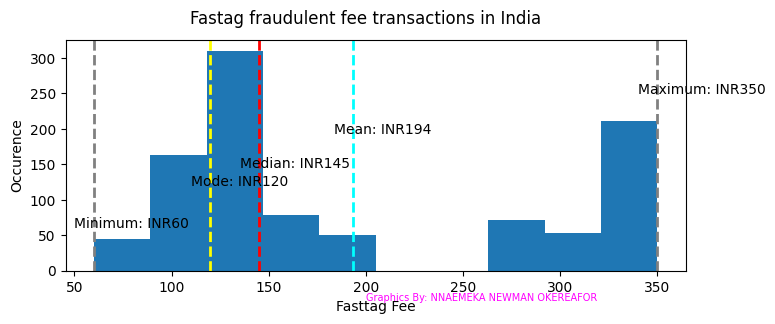

In [108]:
show_distribution(df_no_outliers['Transaction_Amount'])

## Hyothesis Testing

* Null Hypothesis (Ho): There is no significant difference in the amount paid by those whose transactions were flagged as fraud and those whose transactions were not flagged as fraud.

* Alternative Hypothesis (H1): There is a significant difference in the amount paid by those whose transactions were flagged as fraud and those whose transactions were not flagged as fraud.



In [109]:
#Average Transaction amount for non-fraudulent transactions
data['Transaction_Amount'].mean()

187.89314045730285

In [110]:
fraud_transactions = data[data['Fraud_indicator']=='Fraud']['Transaction_Amount']
non_fraud_transactions = data[data['Fraud_indicator']=='Not Fraud']['Transaction_Amount']

#Perform Independent Sample T-test
t_stats = ttest_ind(fraud_transactions,non_fraud_transactions)
print(t_stats)

TtestResult(statistic=2.053087702245118, pvalue=0.040124670104217094, df=4284.0)


Reject the NULL Hypothesis because the p-value is < 0.05. We do have enough evidence to reject the null hypothesis.

In [111]:
# Create a function that we can re-use
# def show_distribution(var_data):
#     '''
#     This function will make a distribution (graph) and display it
#     '''

#     # Get statistics
#     min_val = var_data.min()
#     max_val = var_data.max()
#     mean_val = var_data.mean()
#     med_val = var_data.median()
#     mod_val = var_data.mode()[0]

#     print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
#                                                                                             mean_val,
#                                                                                             med_val,
#                                                                                             mod_val,
#                                                                                             max_val))

#     # Create a figure for 2 subplots (2 rows, 1 column)
#     fig, ax = plt.subplots(2, 1, figsize = (10,4))

#     # Plot the histogram
#     ax[0].hist(var_data)
#     ax[0].set_ylabel('Frequency')
#     ax[0].text(min_val-10, min_val,f"(Minimum: INR{round(min_val)})")
#     ax[0].text(mean_val-10, mean_val,f"(Mean: INR{round(mean_val)})")
#     ax[0].text(med_val-10, med_val,f"(Median: INR{round(med_val)})")
#     ax[0].text(mod_val-10, mod_val,f"(Mode: INR{round(mod_val)})")
#     ax[0].text(max_val-10, max_val,f"(Maximum: INR{round(max_val)})")

#     # Add lines for the mean, median, and mode
#     ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
#     ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

#     #ax.text(0, invt['Investment'].mean(),"Average Investment", color = "fuchsia")

#     # Plot the boxplot
#     ax[1].boxplot(var_data, vert=False)
#     ax[1].set_xlabel('Transaction')

#     # Add a title to the Figure
#     fig.suptitle('Data distribution for transactions that flagged as fraudulent')
#      # Add footer text
#     #fig.text(0.5, 0.01, 'Graphics By: NNAEMEKA NEWMAN OKEREAFOR', ha='left', fontsize=7, color='fuchsia')

#     # Show the figure
#     fig.show()


# show_distribution(df['Transaction_Amount'])